In [ ]:
import pandas as pd
import csv
import seaborn as sns 
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
dataset = pd.read_csv("eletro_aline.csv", encoding='ISO-8859-1')
dataset = dataset.drop(columns=["n da amostra"])
dataset = dataset.dropna()
dataset = shuffle(dataset)


# Organização do Dataset

In [ ]:
prc = int(input("Quantos % para o teste?   "))

Quantos % para o teste?   25


In [ ]:
data_treino = (dataset[:(len(dataset)*prc//100)]) #Separo o treino do teste
data_teste = dataset[(len(dataset)*prc//100):]
print(len(data_treino),len(data_teste))

CS = input("Com ou sem normalização? ")

5 15
Com ou sem normalização? com


In [ ]:
if CS == "sem":
  treinoY = (data_treino["comp"]) #Variavel Alvo
  treinoX = (data_treino.drop(columns= "comp")) #Demais variaveis
  testeY =  data_teste["comp"]
  testeX = data_teste.drop(columns= "comp")

  print(treinoX)
  print(treinoY)
else:
  treinoY = data_treino["comp"]/np.amax(data_treino["comp"],axis=0) #Variavel Alvo
  treinoX = data_treino.drop(columns= "comp")/np.amax(data_treino.drop(columns= "comp"),axis=0) #Demais variaveis
  testeY =  data_teste["comp"]/np.amax(data_teste["comp"],axis=0)
  testeX = data_teste.drop(columns= "comp")/np.amax(data_teste.drop(columns= "comp"),axis=0)

  print(treinoX)
  print(treinoY)

        dist  tempo
18  0.666667    1.0
10  1.000000    1.0
7   0.333333    0.2
0   0.166667    0.2
12  0.833333    0.2
18    1.000000
10    0.485175
7     0.353100
0     0.377358
12    0.061995
Name: comp, dtype: float64


# Dados de Entrada pela saída

In [ ]:
dados = pd.read_csv('eletro_aline.csv')
tempo = dados['tempo'].values
dist = dados['dist'].values
comp = dados['comp'].values

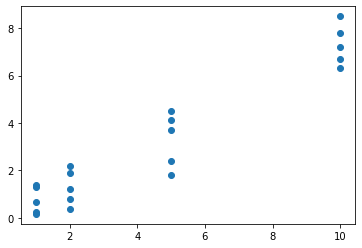

In [ ]:
plt.scatter(tempo,comp)

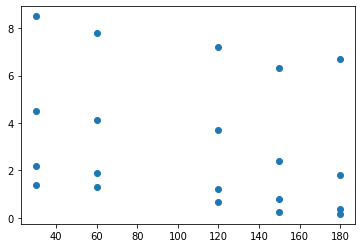

In [ ]:
plt.scatter(dist,comp)

In [ ]:
dataset.corr()

,dist,tempo,comp
dist,1.000000,0.00000,-0.270198
tempo,0.000000,1.00000,0.955790
comp,-0.270198,0.95579,1.000000


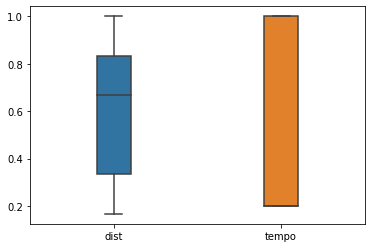

In [ ]:
ax = sns.boxplot(data=treinoX, orient='v', width=0.2)

# Arquitetura da Rede

In [ ]:
model = Sequential()
model.add(Dense(80, input_dim = 2, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "rmsprop",  metrics=['accuracy'])
history = model.fit(treinoX.to_numpy(), treinoY.to_numpy(), validation_split=0.2, epochs=1200, batch_size = 100)

Epoch 1/1200
1/1 [==============================] - 0s 93ms/step - loss: 0.2596 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 2/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.1884 - accuracy: 0.0000e+00 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 3/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.1485 - accuracy: 0.0000e+00 - val_loss: 0.0352 - val_accuracy: 0.0000e+00
Epoch 4/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.1215 - accuracy: 0.0000e+00 - val_loss: 0.0475 - val_accuracy: 0.0000e+00
Epoch 5/1200
1/1 [==============================] - 0s 14ms/step - loss: 0.1023 - accuracy: 0.0000e+00 - val_loss: 0.0596 - val_accuracy: 0.0000e+00
Epoch 6/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.0879 - accuracy: 0.0000e+00 - val_loss: 0.0714 - val_accuracy: 0.0000e+00
Epoch 7/1200
1/1 [==============================] - 0s 21ms/step - loss: 0.0776 - accuracy: 0.2500 - val_l

# Erros da Rede

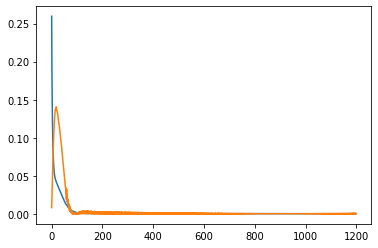

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


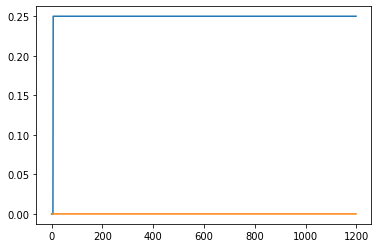

In [ ]:
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# Confiabilidade e Precisão da Regressão


Text(0, 0.5, 'Comprimento obtido pela RN')

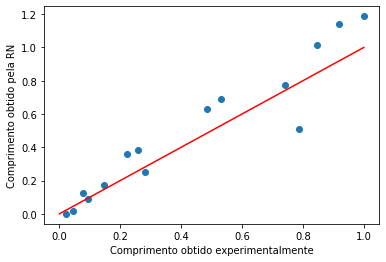

In [ ]:
teste_predict = model.predict(testeX)
plt.scatter(testeY,teste_predict)
plt.plot([0,1],[0,1],'r')
plt.xlabel('Comprimento obtido experimentalmente')
plt.ylabel('Comprimento obtido pela RN')

In [ ]:
from sklearn.metrics import r2_score
r2_score(testeY,teste_predict)

0.8358510699018531

# Predição

In [ ]:
dist_predito = 0.5
tempo_predito = 0.21

In [ ]:
Xnew = np.array([[dist_predito,tempo_predito]])
ynew= model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

NameError: ignored

In [ ]:
teste_predictnp = pd.DataFrame(teste_predict).to_numpy()
testeYnp = pd.DataFrame(testeY).to_numpy()

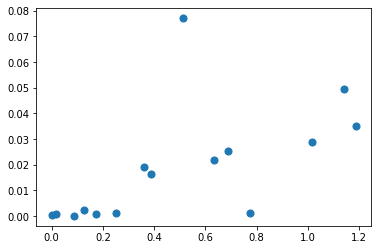

In [ ]:
residuo = testeYnp - teste_predictnp

ax = plt.scatter(x = teste_predictnp, y = residuo**2, s=50)